# 回帰まとめ
- 単回帰・重回帰
- Ridge/ Lasso
- LightGBM

## 回帰とは
- 目的変数が連続値の時にデータに Y = f(X) というモデルを当てはめる事。
- この時Xを説明変数とよぶ, Yを目的変数と呼ぶ。

In [28]:
# 評価用の関数
import numpy as np
# yyplot入れる
def eval(true_, predict_):
    """
    評価用の関数
    """
    print("決定係数", r2_score(true_, predict_))
    yvalues = np.concatenate([true_, predict_])
    
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(true_, predict_)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()
    
    

## 単回帰
- 下記の式の用に目的変数$y$と説明変数$x$の二変量の関係性を、一次方程式で示す
- $  y = ax + b $  


$y$:目的変数,  
$x$:説明変数,  
$a$:傾き,  
$b$:y切片

- ※決定係数の説明については評価指標用のノートブックに改めてまとめ直したい  
1に近い程モデルの当てはまりが良い

In [29]:
# 単一の特徴量のみでの予測をする
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [30]:
# bostonのデータセットを使用する
# 説明変数 13カラム
# 目的変数 単位は、1,000(USD) ボストンの住宅価格
boston = load_boston()

# 説明変数取得
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 目的変数付与
df["y"] = boston.target

In [31]:
# 訓練用データと評価用データに分割する
train_df, test_df = train_test_split(df)

CRIM_決定係数: 0.10580653585444211
決定係数 0.10580653585444211


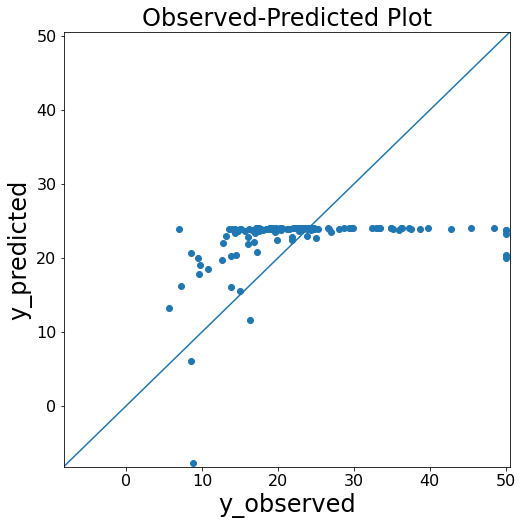

ZN_決定係数: 0.11897072663147068
決定係数 0.11897072663147068


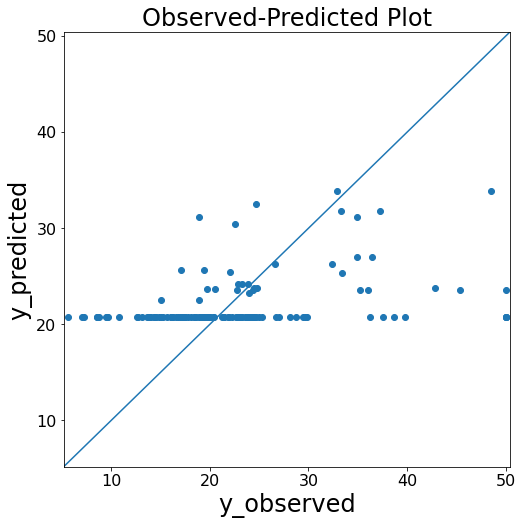

INDUS_決定係数: 0.20747415266264835
決定係数 0.20747415266264835


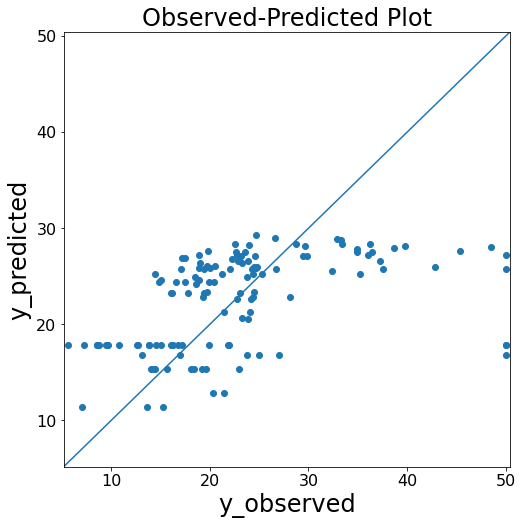

CHAS_決定係数: 0.0383089551725998
決定係数 0.0383089551725998


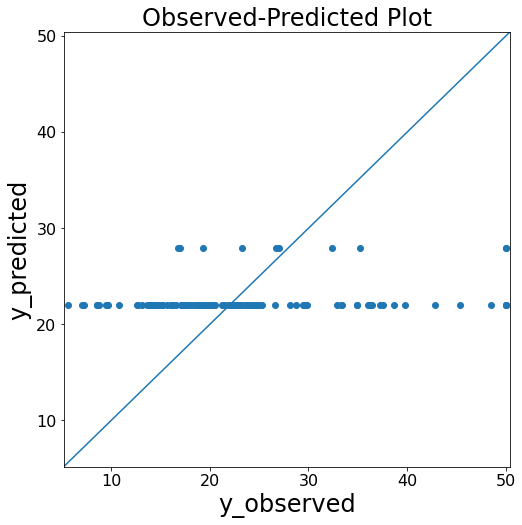

NOX_決定係数: 0.16520205276403022
決定係数 0.16520205276403022


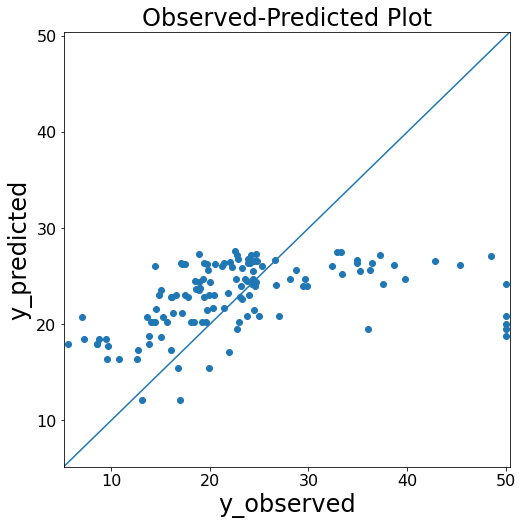

RM_決定係数: 0.5384964964599123
決定係数 0.5384964964599123


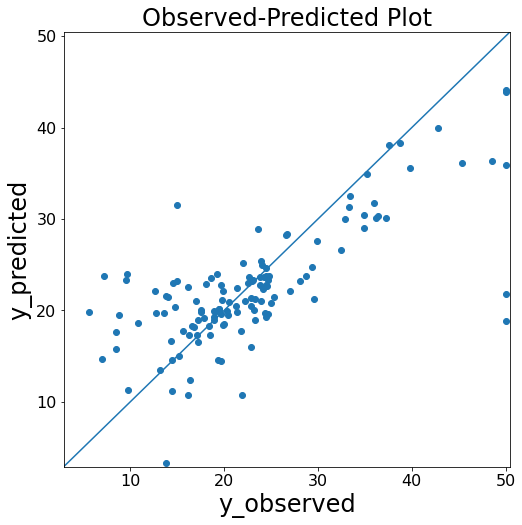

AGE_決定係数: 0.09830308377609454
決定係数 0.09830308377609454


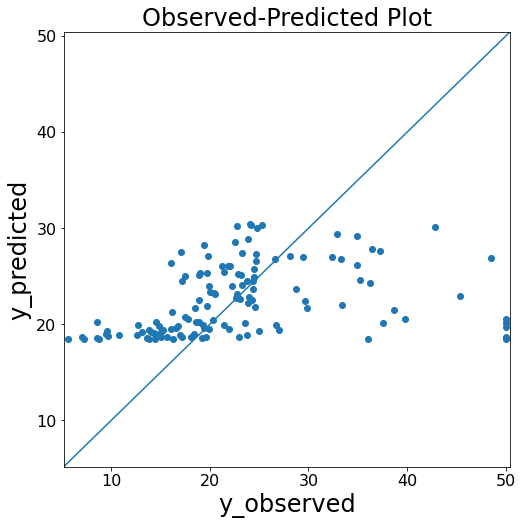

DIS_決定係数: 0.03677032606765307
決定係数 0.03677032606765307


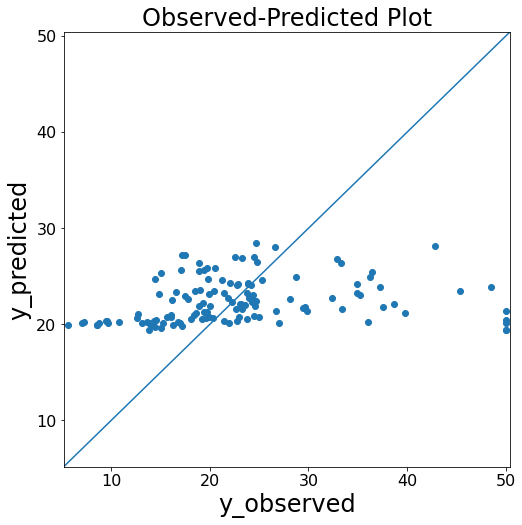

RAD_決定係数: 0.08872143167226176
決定係数 0.08872143167226176


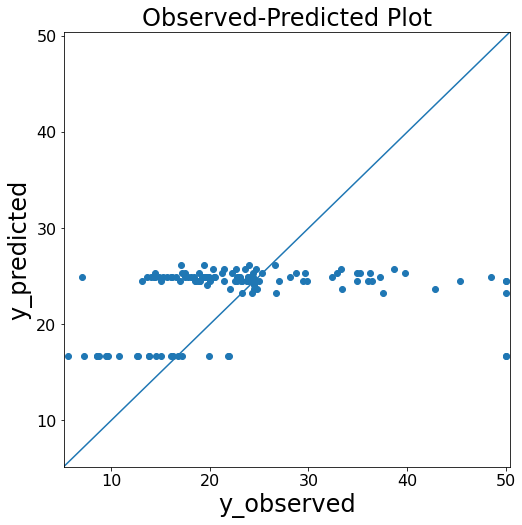

TAX_決定係数: 0.19435241328857078
決定係数 0.19435241328857078


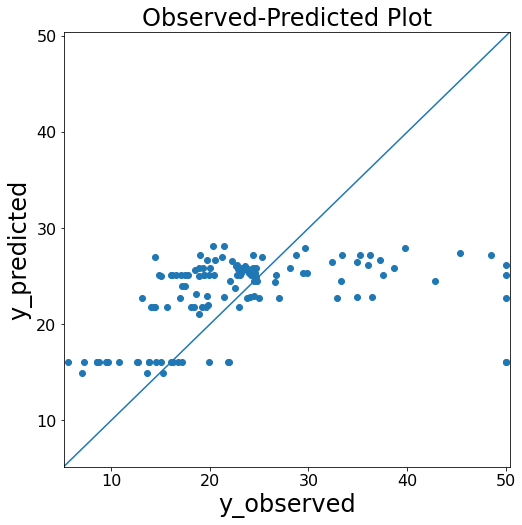

PTRATIO_決定係数: 0.21080344894375835
決定係数 0.21080344894375835


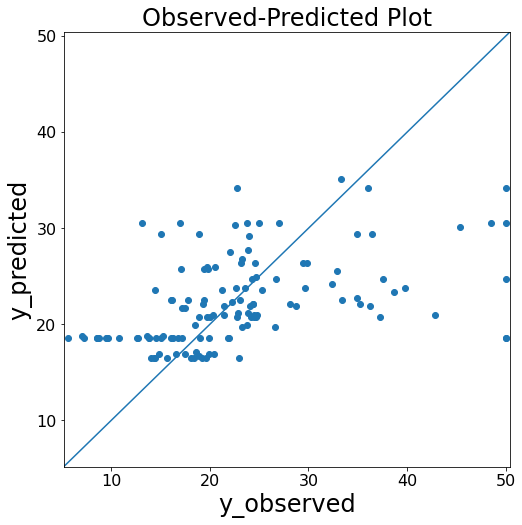

B_決定係数: 0.11137772905498133
決定係数 0.11137772905498133


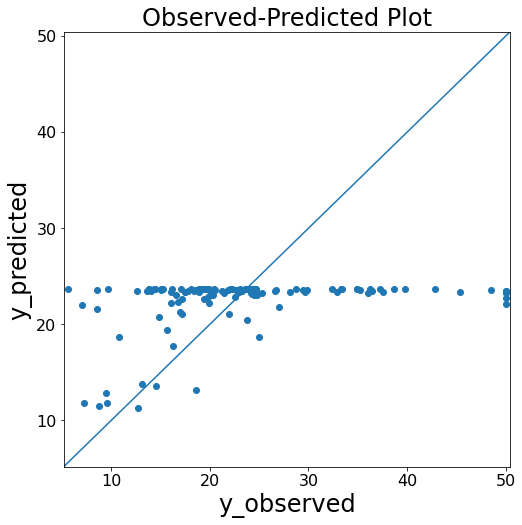

LSTAT_決定係数: 0.5156975858426045
決定係数 0.5156975858426045


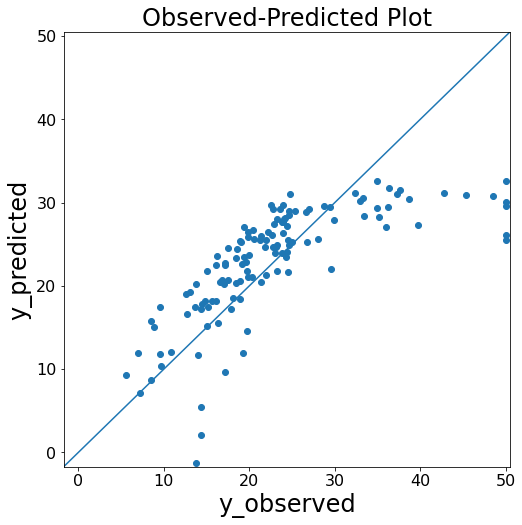

In [33]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
for target in target_col:
    X_train = train_df.loc[:, [target]]
    Y_train = train_df.loc[:, ["y"]]

    X_test = test_df.loc[:, [target]]
    Y_test = test_df.loc[:, ["y"]]
    
    model = linear_model.LinearRegression()
    model.fit(X_train,Y_train)
    
    pred_y = model.predict(X_test)
    
    print("{}_決定係数:".format(target),r2_score(Y_test, pred_y))
    
    eval(Y_test, pred_y)

# 重回帰分析
- 多変量解析の一つ
- 説明変数が複数

- 単回帰
- $  y = ax + b $ 

- 重回帰分析
-  $  y = b1x1 + b2x2 + b3x3 ・・・b0 $ 
- b1,b2,b3... : 偏回帰係数

重回帰分析_決定係数: 0.7002952645007747
決定係数 0.7002952645007747


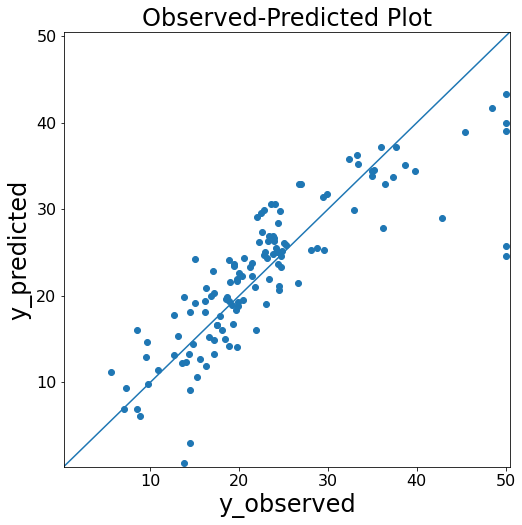

In [34]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X_train = train_df.loc[:, target_col]
Y_train = train_df.loc[:, ["y"]]

X_test = test_df.loc[:, target_col]
Y_test = test_df.loc[:, ["y"]]
    
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
    
pred_y = model.predict(X_test)
    
print("重回帰分析_決定係数:".format(target),r2_score(Y_test, pred_y))

eval(Y_test, pred_y)

## Ridge回帰とは?
- 過学習を防ぐため線形回帰に正則化項(ペナルティ項)としてL2ノルムを導入したモデル
- 最小二乗法の式に正則化項を加え、その最小を求めることでモデル関数を発見する
- L2ノルム : ユークリッド距離と呼ばれるもので、ベクトル成分同士の差の二乗和の平方根

- 0に収束することが出来ないことに留意
- 係数の絶対値の大きさを可能な限り小さくする

## Lasso回帰とは


In [35]:
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [14]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

決定係数 0.6554460628881653


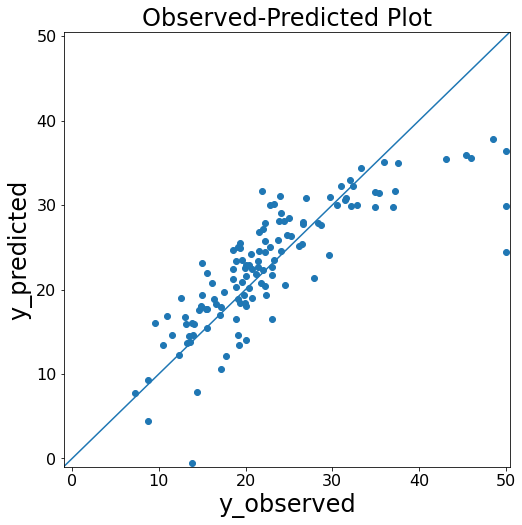

In [36]:
# Lasso回帰
# 訓練用データと、評価用データに分割する
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,target_col],df["y"],random_state=123)

# モデルの作成
model = Lasso()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)
eval(y_test, pred)

決定係数 0.6775930475897151


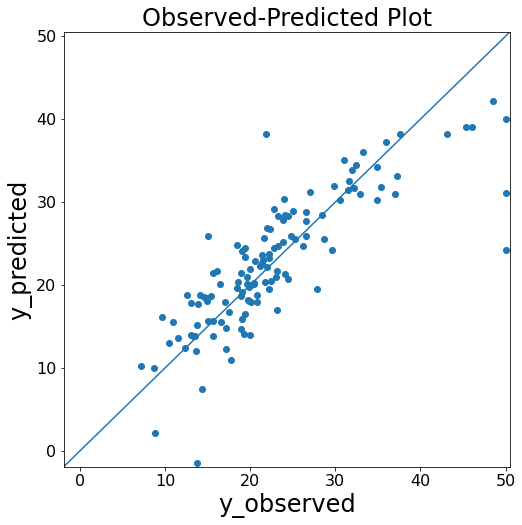

In [37]:
# Ridge回帰

# モデルの作成
model = Ridge()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)
eval(y_test, pred)

# LightGBMで線形回帰

In [30]:
import lightgbm as lgb
from sklearn.model_selection import *

In [31]:
# モデルの学習
model = lgb.LGBMRegressor() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測
y_pred = model.predict(X_test)
r2_score(y_test, pred)

0.6775930475897151

決定係数 0.6554460628881653


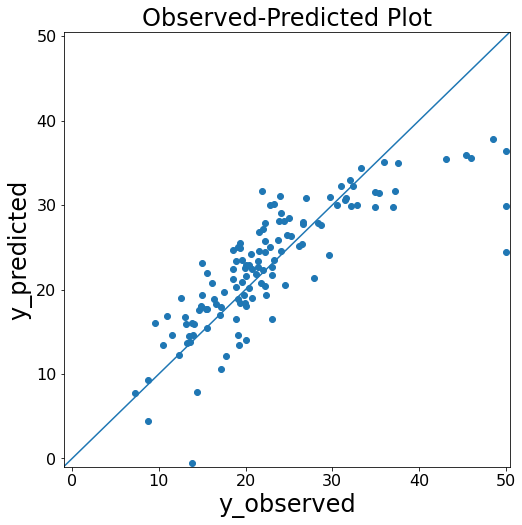

In [60]:
eval(y_test, pred)